Atmospheric and Instrumental conditions for Standard Star are: 

Date and time of the observation is 2017-02-20T08:49:32.0584
Seeing at the begining of the observation is 0.53 arcsec
Seeing at the end of the observation is 0.53 arcsec
Slit width is 0.75 arcsec
Integrated water vapor at the start of the observation is 11.0 mm
Integrated water vapor at the end of the observation is 11.0 mm
Airmass at the start is 1.147
Airmass at the end is 1.146


Atmospheric and Instrumental conditions for Science are: 

Date and time of the observation is 2017-02-20T09:10:57.5126
Seeing at the begining of the observation is 0.57 arcsec
Seeing at the end of the observation is 0.52 arcsec
Slit width is 0.75 arcsec
Integrated water vapor at the start of the observation is 11.47 mm
Integrated water vapor at the end of the observation is 11.66 mm
Airmass at the start is 1.234
Airmass at the end is 1.233


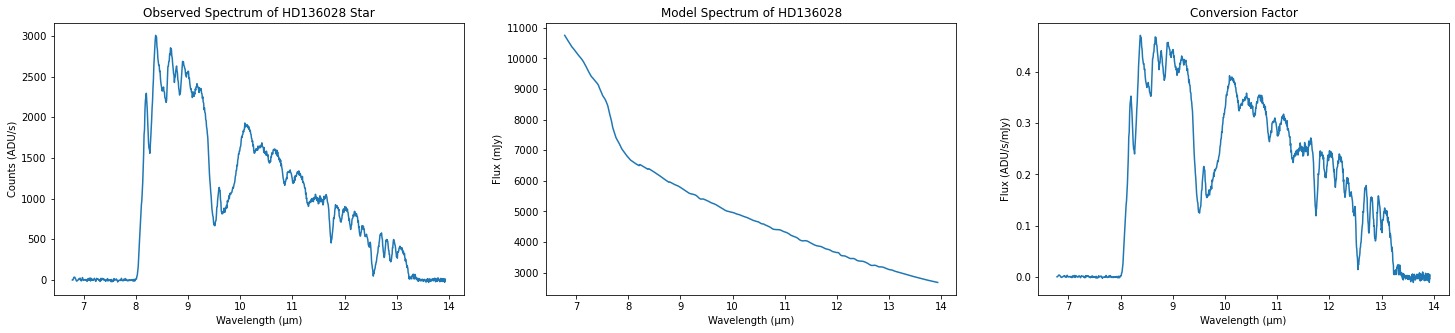

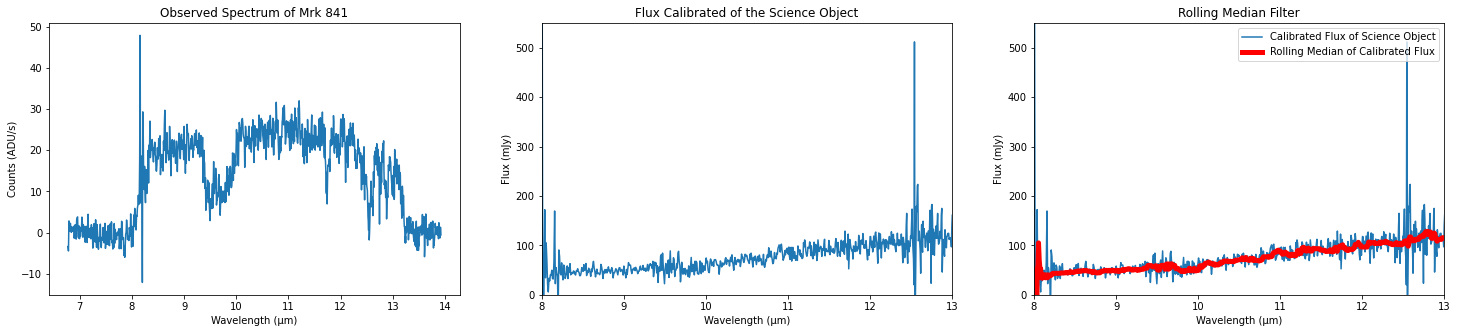

In [124]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def std_spc(file_path):
    hdu = fits.open(file_path)
    std_spc.d = hdu[1].data
    std_spc.date = hdu[0].header['DATE-OBS']
    std_spc.seeing_start = hdu[0].header['HIERARCH ESO TEL AMBI FWHM START']
    std_spc.seeing_end = hdu[0].header['HIERARCH ESO TEL AMBI FWHM END']
    std_spc.slit_width = hdu[0].header['HIERARCH ESO INS SLIT1 WID']
    std_spc.iwv_start = hdu[0].header['HIERARCH ESO TEL AMBI IWV START']
    std_spc.iwv_end = hdu[0].header['HIERARCH ESO TEL AMBI IWV END']
    std_spc.am_start = hdu[0].header['HIERARCH ESO TEL AIRM START']
    std_spc.am_end = hdu[0].header['HIERARCH ESO TEL AIRM END']
    std_spc.l = (10**6)*std_spc.d['WLEN']
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
    ax1.plot(std_spc.l, std_spc.d ['SPC_EXTRACTED'])
    ax1.title.set_text('Observed Spectrum of HD136028 Star')
    ax1.set_xlabel('Wavelength (\u03BCm)')
    ax1.set_ylabel('Counts (ADU/s)')
    ax2.plot(std_spc.l, std_spc.d ['STD_STAR_MODEL'])
    ax2.title.set_text('Model Spectrum of HD136028')
    ax2.set_xlabel('Wavelength (\u03BCm)')
    ax2.set_ylabel('Flux (mJy)')
    #Flux calibration, conversion factor, units(ADU/s/mJy)
    ax3.plot(std_spc.l, std_spc.d ['SPC_EXTRACTED']/std_spc.d ['STD_STAR_MODEL'])
    ax3.title.set_text('Conversion Factor')
    ax3.set_xlabel('Wavelength (\u03BCm)')
    ax3.set_ylabel('Flux (ADU/s/mJy)')
    

def sci_spc(file_path1):
    hdu1 = fits.open(file_path1)
    d1 = hdu1[1].data
    sci_spc.date = hdu1[0].header['DATE-OBS']
    sci_spc.seeing_start = hdu1[0].header['HIERARCH ESO TEL AMBI FWHM START']
    sci_spc.seeing_end = hdu1[0].header['HIERARCH ESO TEL AMBI FWHM END']
    sci_spc.slit_width = hdu1[0].header['HIERARCH ESO INS SLIT1 WID']
    sci_spc.iwv_start = hdu1[0].header['HIERARCH ESO TEL AMBI IWV START']
    sci_spc.iwv_end = hdu1[0].header['HIERARCH ESO TEL AMBI IWV END']
    sci_spc.am_start = hdu1[0].header['HIERARCH ESO TEL AIRM START']
    sci_spc.am_end = hdu1[0].header['HIERARCH ESO TEL AIRM END']
    sci_spc.l = (10**6)*d1['WLEN']
    fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(25,5))
    ax4.plot(sci_spc.l, d1['SPC_EXTRACTED'])
    ax4.title.set_text('Observed Spectrum of Mrk 841')
    ax4.set_xlabel('Wavelength (\u03BCm)')
    ax4.set_ylabel('Counts (ADU/s)')
    ax5.plot(sci_spc.l, d1['SPC_EXTRACTED']/(std_spc.d ['SPC_EXTRACTED']/std_spc.d ['STD_STAR_MODEL']))
    ax5.title.set_text('Flux Calibrated of the Science Object')
    ax5.set_xlabel('Wavelength (\u03BCm)')
    ax5.set_ylabel('Flux (mJy)')
    ax5.set_xlim([8,13])
    ax5.set_ylim([0,550])
    df = pd.DataFrame(d1['SPC_EXTRACTED']/(std_spc.d ['SPC_EXTRACTED']/std_spc.d ['STD_STAR_MODEL']))
    roll_median = df.rolling(15,min_periods=1).median()
    rm1 = roll_median.to_numpy()
    ax6.plot(sci_spc.l, d1['SPC_EXTRACTED']/(std_spc.d ['SPC_EXTRACTED']/std_spc.d ['STD_STAR_MODEL']), label='Calibrated Flux of Science Object')
    ax6.plot(sci_spc.l, rm1, color='r', linewidth=5, label='Rolling Median of Calibrated Flux')
    ax6.title.set_text('Rolling Median Filter')
    ax6.set_xlabel('Wavelength (\u03BCm)')
    ax6.set_ylabel('Flux (mJy)')
    ax6.legend(loc='upper right')
    ax6.set_xlim([8,13])
    ax6.set_ylim([0,550])
std_spc('/home/ritikshah/reflex_data/reflex_end_products/2021-11-09T11:02:58/VISIR.2017-02-20T09:10:57.513_tpl/STD_spc_HD136028_4.6Jy_SPC_PHOT_TAB.fits')  
sci_spc('/home/ritikshah/reflex_data/reflex_end_products/2021-11-09T11:02:58/VISIR.2017-02-20T09:10:57.513_tpl/Mrk0841_SPC_OBS_LMR_TAB.fits')

print('Atmospheric and Instrumental conditions for Standard Star are: ')
print()
print('Date and time of the observation is {}'.format(std_spc.date))
print('Seeing at the begining of the observation is {} arcsec'.format(std_spc.seeing_start))
print('Seeing at the end of the observation is {} arcsec'.format(std_spc.seeing_end))
print('Slit width is {} arcsec'.format(std_spc.slit_width))
print('Integrated water vapor at the start of the observation is {} mm'.format(std_spc.iwv_start))
print('Integrated water vapor at the end of the observation is {} mm'.format(std_spc.iwv_end))
print('Airmass at the start is {}'.format(std_spc.am_start))
print('Airmass at the end is {}'.format(std_spc.am_end))
print()
print()
print('Atmospheric and Instrumental conditions for Science are: ')
print()
print('Date and time of the observation is {}'.format(sci_spc.date))
print('Seeing at the begining of the observation is {} arcsec'.format(sci_spc.seeing_start))
print('Seeing at the end of the observation is {} arcsec'.format(sci_spc.seeing_end))
print('Slit width is {} arcsec'.format(sci_spc.slit_width))
print('Integrated water vapor at the start of the observation is {} mm'.format(sci_spc.iwv_start))
print('Integrated water vapor at the end of the observation is {} mm'.format(sci_spc.iwv_end))
print('Airmass at the start is {}'.format(sci_spc.am_start))
print('Airmass at the end is {}'.format(sci_spc.am_end))